# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\vineet\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [6]:
# #Sampling down the data
project_data = project_data.sample(frac=0.5)

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
89868      113349  p043136  902f45cc797c7614b1ffabfbf5e65e35            Mr.   
87154       45036  p194916  29cf137e5a40b0f141d9fd7898303a5c           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
89868           WV        2016-08-01 11:37:46             Grades 3-5   
87154           HI        2017-04-30 23:11:45            Grades 9-12   

                                           project_title  \
89868  A Natural, Fresh Water River Ecosystem of the ...   
87154                Nanakuli Football Projection Screen   

                                         project_essay_1  \
89868  Our school is a rural-based Title One school. ...   
87154  Our day starts with about 100 students athlete...   

                                         project_essay_2 project_essay_3  \
89868  As teacher certified in science and a lifelong...             NaN   
87154  Lack of equipment prohibits proper training an...             NaN   

      project_essay_4                           project_resource_summary  \
89868             NaN  My students need a Natural Freshwater Tank \r\...   
87154             NaN  My students need a Projection Screen to use fo...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
89868                                             0                    1   
87154                                             5                    1   

        price  quantity                clean_categories  \
89868  337.22         2  Math_Science Literacy_Language   
87154  143.36         2                   Health_Sports   

                           clean_subcategories  \
89868  EnvironmentalScience Literature_Writing   
87154                               TeamSports   

                                                   essay  
89868  Our school is a rural-based Title One school. ...  
87154  Our day starts with about 100 students athlete...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
# print(project_data['essay'].values[99999])
# print("="*50)

Our school is a rural-based Title One school. Our students come from a very impoverished background, with many parents displaced by the changing fortunes of coal mining and related industries. But the children are very motivated to succeed.\r\n\r\n When my students are exposed to ideas in an environment that is stimulating, they become highly motivated.  Also, most of our parents, though poor, are very supportive of their children's education, and appreciative of all efforts put forth by teachers on behalf of the children. Give the hardworking, blue collar folks in our community a chance to shine, and we will! In my first year of teaching, my students achieved a 30% year over year in their math scores. Imagine what we can do with a little help from our friends.As teacher certified in science and a lifelong fish enthusiast, I know the huge value a fish tank can bring to the classroom. A fish tank modeled on the Amazon ecosystem would be extra special indeed. \r\nLast year in our fourth 

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My students are special because they are dreamers of being scientists, doctors, mathematicians, engineers and architects to comeback and build up the community they are growing up in. Some of them have experienced misfortunes at an early age and they come from all walks of life. More than 90% of our students are African American or Latino and many struggle with reading and number sense. My students are our future and I want to make sure they are prepared for leadership.STEM integrates them into a cohesive learning paradigm based on real-world applications to pique students' interest into them wanting to pursuer he world of science, technology, engineering and math  not because they have to. These materials will help our future explores meet their goal of exploring science and math and increasing their knowledge in these fields. These materials will help prepare my students for the growing world of math and science and improve the quality of critical thinking. Having the experience of w

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are special because they are dreamers of being scientists, doctors, mathematicians, engineers and architects to comeback and build up the community they are growing up in. Some of them have experienced misfortunes at an early age and they come from all walks of life. More than 90% of our students are African American or Latino and many struggle with reading and number sense. My students are our future and I want to make sure they are prepared for leadership.STEM integrates them into a cohesive learning paradigm based on real-world applications to pique students' interest into them wanting to pursuer he world of science, technology, engineering and math  not because they have to. These materials will help our future explores meet their goal of exploring science and math and increasing their knowledge in these fields. These materials will help prepare my students for the growing world of math and science and improve the quality of critical thinking. Having the experience of w

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are special because they are dreamers of being scientists doctors mathematicians engineers and architects to comeback and build up the community they are growing up in Some of them have experienced misfortunes at an early age and they come from all walks of life More than 90 of our students are African American or Latino and many struggle with reading and number sense My students are our future and I want to make sure they are prepared for leadership STEM integrates them into a cohesive learning paradigm based on real world applications to pique students interest into them wanting to pursuer he world of science technology engineering and math not because they have to These materials will help our future explores meet their goal of exploring science and math and increasing their knowledge in these fields These materials will help prepare my students for the growing world of math and science and improve the quality of critical thinking Having the experience of working with th

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████| 54624/54624 [00:47<00:00, 1152.51it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'my students special dreamers scientists doctors mathematicians engineers architects comeback build community growing some experienced misfortunes early age come walks life more 90 students african american latino many struggle reading number sense my students future i want make sure prepared leadership stem integrates cohesive learning paradigm based real world applications pique students interest wanting pursuer world science technology engineering math not these materials help future explores meet goal exploring science math increasing knowledge fields these materials help prepare students growing world math science improve quality critical thinking having experience working materials enhance learning classroom we already special section room reserved new materials nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    
preprocessed_titles[1]

100%|█████████████████████████████████| 54624/54624 [00:02<00:00, 24334.56it/s]


'nanakuli football projection screen'

In [21]:
preprocessed_essays[20000]

project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [22]:
project_data['clean_titles'] = preprocessed_titles

## 1.5 Preparing data for models

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [24]:
# # we use count vectorizer to convert the values into one 
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
# categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
# print(vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

In [25]:
# # we use count vectorizer to convert the values into one 
# vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
# sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
# print(vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

In [26]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [27]:
# # We are considering only the words which appeared in at least 10 documents(rows or projects).
# vectorizer = CountVectorizer(min_df=10)
# text_bow = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_bow.shape)

In [28]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [29]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
# text_tfidf = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_tfidf.shape)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [30]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [31]:
# # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# # make sure you have the glove_vectors file
# with open('glove_vectors', 'rb') as f:
#     model = pickle.load(f)
#     glove_words =  set(model.keys())

In [32]:
# # average Word2Vec
# # compute average word2vec for each review.
# avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word]
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_vectors.append(vector)

# print(len(avg_w2v_vectors))
# print(len(avg_w2v_vectors[0]))

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [33]:
# # S = ["abc def pqr", "def def def abc", "pqr pqr def"]
# tfidf_model = TfidfVectorizer()
# tfidf_model.fit(preprocessed_essays)
# # we are converting a dictionary with word as a key, and the idf as a value
# dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
# tfidf_words = set(tfidf_model.get_feature_names())

In [34]:
# # average Word2Vec
# # compute average word2vec for each review.
# tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if (word in glove_words) and (word in tfidf_words):
#             vec = model[word] # getting the vector for each word
#             # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#             tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#             vector += (vec * tf_idf) # calculating tfidf weighted w2v
#             tf_idf_weight += tf_idf
#     if tf_idf_weight != 0:
#         vector /= tf_idf_weight
#     tfidf_w2v_vectors.append(vector)

# print(len(tfidf_w2v_vectors))
# print(len(tfidf_w2v_vectors[0]))

In [35]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [36]:
# price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
# project_data = pd.merge(project_data, price_data, on='id', how='left')

In [37]:
# # check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# # standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# from sklearn.preprocessing import StandardScaler

# # price_standardized = standardScalar.fit(project_data['price'].values)
# # this will rise the error
# # ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# # Reshape your data either using array.reshape(-1, 1)

# price_scalar = StandardScaler()
# price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# # Now standardize the data with above maen and variance.
# price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [38]:
# price_standardized

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [39]:
# print(categories_one_hot.shape)
# # print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)

In [40]:
# # merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# from scipy.sparse import hstack
# # with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

In [41]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [42]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

C:\Users\vineet\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
sentiment_titles=[]

for sentance in tqdm(project_data['essay'].values):
    ss = sid.polarity_scores(sentance)
    sentiment_titles.append(ss)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vineet\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


 14%|█████▏                              | 7886/54624 [00:37<04:26, 175.40it/s]

KeyboardInterrupt: 

 14%|█████▏                              | 7886/54624 [00:50<04:26, 175.40it/s]

In [ ]:
project_data.columns

In [ ]:
sentiment_neg=[]
sentiment_neu=[]
sentiment_pos=[]
sentiment_compound=[]

for i in sentiment_titles:
    for j,k in i.items():
        if(j=='neg'):
            sentiment_neg.append(k)
        else:
            if(j=='neu'):
                sentiment_neu.append(k)
            else:
                if(j=='pos'):
                    sentiment_pos.append(k)   
                else:
                    if(j=='compound'):
                        sentiment_compound.append(k)

In [47]:
project_data['sentiment_neg'] = sentiment_neg
project_data['sentiment_neu'] = sentiment_neu
project_data['sentiment_pos'] = sentiment_pos
project_data['sentiment_compound'] = sentiment_compound

In [44]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

In [45]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
project_data['words_title'] = project_data['project_title'].str.split().str.len()

In [46]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
project_data['words_essay'] = project_data['essay'].str.split().str.len()


In [47]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
89868      113349  p043136  902f45cc797c7614b1ffabfbf5e65e35            Mr.   
87154       45036  p194916  29cf137e5a40b0f141d9fd7898303a5c           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
89868           WV        2016-08-01 11:37:46             Grades 3-5   
87154           HI        2017-04-30 23:11:45            Grades 9-12   

                                           project_title  \
89868  A Natural, Fresh Water River Ecosystem of the ...   
87154                Nanakuli Football Projection Screen   

                                project_resource_summary  \
89868  My students need a Natural Freshwater Tank \r\...   
87154  My students need a Projection Screen to use fo...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
89868                                             0                    1   
87154                                             5                    1   

        price  quantity                clean_categories  \
89868  337.22         2  Math_Science Literacy_Language   
87154  143.36         2                   Health_Sports   

                           clean_subcategories  \
89868  EnvironmentalScience Literature_Writing   
87154                               TeamSports   

                                                   essay  \
89868  Our school is a rural-based Title One school. ...   
87154  Our day starts with about 100 students athlete...   

                                            clean_essays  \
89868  our school rural based title one school our st...   
87154  our day starts 100 students athletes low incom...   

                                          clean_titles  words_title  \
89868  natural fresh water river ecosystem amazon tank           10   
87154              nanakuli football projection screen            4   

       words_essay  
89868          360  
87154          314

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [48]:
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [49]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data

In [50]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [51]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(24520, 19) (24520,)
(12078, 19) (12078,)
(18026, 19) (18026,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 9) (24520,)
(12078, 9) (12078,)
(18026, 9) (18026,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [53]:
#Encoding project_subject_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_cv_clean_subcat_ohe.shape, y_cv.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 30) (24520,)
(12078, 30) (12078,)
(18026, 30) (18026,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [54]:
#one hot encoding for teacher_prefix
from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(str(word).split())


teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))
print(sorted_teacher_dict)

vectorizer = CountVectorizer(vocabulary=list((sorted_teacher_dict.keys())), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
#Encoding Teacher prefix
# vectorizer = CountVectorizer()
# vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

{'null': 1, 'Dr.': 8, 'Teacher': 1167, 'Mr.': 5368, 'Ms.': 19403, 'Mrs.': 28677}
After vectorizations
(24520, 6) (24520,)
(12078, 6) (12078,)
(18026, 6) (18026,)
['null', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']


In [55]:
#Encoding school state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 51) (24520,)
(12078, 51) (12078,)
(18026, 51) (18026,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [56]:
from collections import Counter
my_counter = Counter()
for word in X_train['project_grade_category'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))
# print(sorted_grade_dict.keys())

In [57]:
#one hot encoding the catogorical features: project_grade_category
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 5) (24520,)
(12078, 5) (12078,)
(18026, 5) (18026,)
['9-12', '6-8', '3-5', 'PreK-2', 'Grades']


In [58]:
#Normalising the numerical feature
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['price'].values.reshape(-1,1))

X_train_price_std = standard_vec.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = standard_vec.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = standard_vec.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [59]:
#Normalising the numerical feature-no of words in essay
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['words_essay'].values.reshape(-1,1))

X_train_words_essay_std = standard_vec.transform(X_train['words_essay'].values.reshape(-1,1))
X_cv_words_essay_std = standard_vec.transform(X_cv['words_essay'].values.reshape(-1,1))
X_test_words_essay_std = standard_vec.transform(X_test['words_essay'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_words_essay_std.shape, y_train.shape)
print(X_cv_words_essay_std.shape, y_cv.shape)
print(X_test_words_essay_std.shape, y_test.shape)
print("="*100)

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [60]:
#Normalising the numerical feature-no of words in titles
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['words_title'].values.reshape(-1,1))

X_train_words_title_std = standard_vec.transform(X_train['words_title'].values.reshape(-1,1))
X_cv_words_title_std = standard_vec.transform(X_cv['words_title'].values.reshape(-1,1))
X_test_words_title_std = standard_vec.transform(X_test['words_title'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_words_title_std.shape, y_train.shape)
print(X_cv_words_title_std.shape, y_cv.shape)
print(X_test_words_title_std.shape, y_test.shape)
print("="*100)

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [61]:
#Normalising the numerical feature-sentiment score of neg words
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['sentiment_neg'].values.reshape(-1,1))

X_train_sentiment_neg_std = standard_vec.transform(X_train['sentiment_neg'].values.reshape(-1,1))
X_cv_sentiment_neg_std = standard_vec.transform(X_cv['sentiment_neg'].values.reshape(-1,1))
X_test_sentiment_neg_std = standard_vec.transform(X_test['sentiment_neg'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sentiment_neg_std.shape, y_train.shape)
print(X_cv_sentiment_neg_std.shape, y_cv.shape)
print(X_test_sentiment_neg_std.shape, y_test.shape)
print("="*100)

KeyError: 'sentiment_neg'

In [62]:
#Normalising the numerical feature-sentiment score of neutral words
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['sentiment_neu'].values.reshape(-1,1))

X_train_sentiment_neu_std = standard_vec.transform(X_train['sentiment_neu'].values.reshape(-1,1))
X_cv_sentiment_neu_std = standard_vec.transform(X_cv['sentiment_neu'].values.reshape(-1,1))
X_test_sentiment_neu_std = standard_vec.transform(X_test['sentiment_neu'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sentiment_neu_std.shape, y_train.shape)
print(X_cv_sentiment_neu_std.shape, y_cv.shape)
print(X_test_sentiment_neu_std.shape, y_test.shape)
print("="*100)

KeyError: 'sentiment_neu'

In [63]:
#Normalising the numerical feature-sentiment score of positive words
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['sentiment_pos'].values.reshape(-1,1))

X_train_sentiment_pos_std = standard_vec.transform(X_train['sentiment_pos'].values.reshape(-1,1))
X_cv_sentiment_pos_std = standard_vec.transform(X_cv['sentiment_pos'].values.reshape(-1,1))
X_test_sentiment_pos_std = standard_vec.transform(X_test['sentiment_pos'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sentiment_pos_std.shape, y_train.shape)
print(X_cv_sentiment_pos_std.shape, y_cv.shape)
print(X_test_sentiment_pos_std.shape, y_test.shape)
print("="*100)

KeyError: 'sentiment_pos'

In [64]:
#Normalising the numerical feature-sentiment score of compound words
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['sentiment_compound'].values.reshape(-1,1))

X_train_sentiment_compound_std = standard_vec.transform(X_train['sentiment_compound'].values.reshape(-1,1))
X_cv_sentiment_compound_std = standard_vec.transform(X_cv['sentiment_compound'].values.reshape(-1,1))
X_test_sentiment_compound_std = standard_vec.transform(X_test['sentiment_compound'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sentiment_compound_std.shape, y_train.shape)
print(X_cv_sentiment_compound_std.shape, y_cv.shape)
print(X_test_sentiment_compound_std.shape, y_test.shape)
print("="*100)

KeyError: 'sentiment_compound'

In [65]:
#Normalising the numerical features: teacher_number_of_previously _posted_projects
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projects_std = standard_vec.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_std = standard_vec.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projects_std = standard_vec.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [66]:
#Normalising numerical features: "quantity
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['quantity'].values.reshape(-1,1))

X_train_qty_std = standard_vec.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_qty_std = standard_vec.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_qty_std = standard_vec.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_qty_std.shape, y_train.shape)
print(X_cv_qty_std.shape, y_cv.shape)
print(X_test_qty_std.shape, y_test.shape)
print("="*100)

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\vineet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [71]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 5000) (24520,)
(12078, 5000) (12078,)
(18026, 5000) (18026,)


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_bow = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_bow = vectorizer.transform(X_test['clean_titles'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1766) (24520,)
(12078, 1766) (12078,)
(18026, 1766) (18026,)


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_bow = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_summary_bow = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_summary_bow = vectorizer.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_bow.shape, y_train.shape)
print(X_cv_summary_bow.shape, y_cv.shape)
print(X_test_summary_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 5000) (24520,)
(12078, 5000) (12078,)
(18026, 5000) (18026,)


In [74]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_titles_bow,X_train_summary_bow,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_titles_bow,X_cv_summary_bow,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_titles_bow,X_test_summary_bow,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 11870) (24520,)
(12078, 11870) (12078,)
(18026, 11870) (18026,)


In [75]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

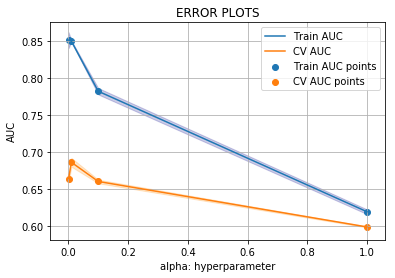

Wall time: 1.93 s


In [76]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier()
tuned_parameters = {'alpha': [10**-3, 10**-2,10**-1, 10**0]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

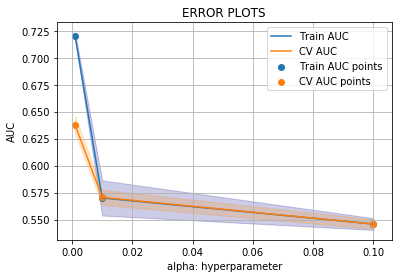

Wall time: 2.55 s


In [77]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier(penalty='l1')
tuned_parameters = {'alpha': [10**-3, 10**-2,10**-1]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

L2 regulizer seems to be more apt.since AUC for L2>AUC for L1.

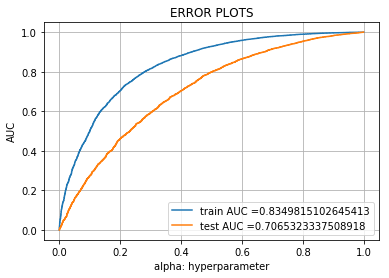

Wall time: 1.07 s


In [78]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

sgd=SGDClassifier(alpha=0.01)
#https://github.com/scikit-learn/scikit-learn/issues/7278
calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
calibrated_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(calibrated_clf, X_tr)    
y_test_pred = batch_predict(calibrated_clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [79]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [80]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.774
[[ 1840  1840]
 [ 1497 19343]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999996583310838 for threshold 0.804
[[ 1248  1457]
 [ 2651 12670]]


the maximum value of tpr*(1-fpr) 0.24999996583310838 for threshold 0.804


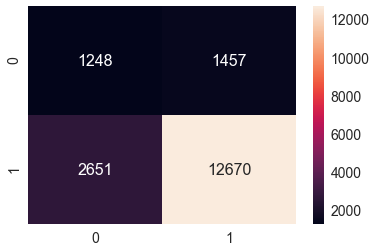

In [81]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [82]:
#Vectorizing Essays
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2),max_features=5000)
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essays'].values)

# print(X_train_essay_tfidf.shape)
# print(X_train_essay_tfidf.shape)
# print(X_train_essay_tfidf.shape)

In [83]:
#Vectorizing Titles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_tfidf = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_tfidf = vectorizer.transform(X_test['clean_titles'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (24520, 1766)
CV shape: (12078, 1766)
Test shape: (18026, 1766)


In [84]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_summary_bow,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_summary_bow,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_summary_bow,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 11870) (24520,)
(12078, 11870) (12078,)
(18026, 11870) (18026,)


In [85]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

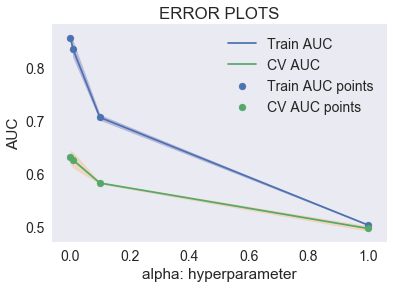

Wall time: 2.13 s


In [86]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier()
tuned_parameters = {'alpha': [10**-3, 10**-2,10**-1, 10**0]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

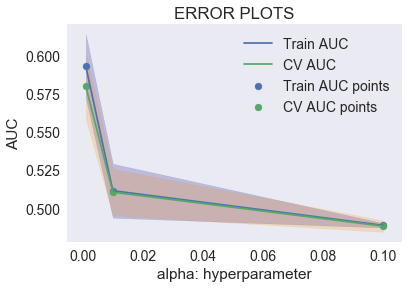

Wall time: 2.29 s


In [87]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier(penalty='l1')
tuned_parameters = {'alpha': [10**-3, 10**-2,10**-1]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

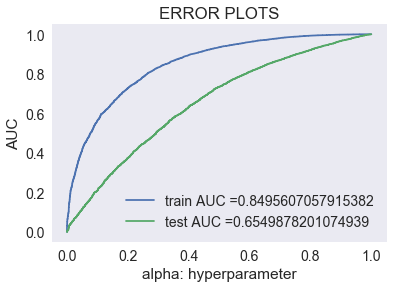

Wall time: 812 ms


In [88]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

sgd=SGDClassifier(alpha=0.001)
#https://github.com/scikit-learn/scikit-learn/issues/7278
calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
calibrated_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(calibrated_clf, X_tr)    
y_test_pred = batch_predict(calibrated_clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [89]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [90]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.249999926157845 for threshold 0.8
[[ 1841  1839]
 [ 1375 19465]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999658331084 for threshold 0.819
[[ 1019  1686]
 [ 2695 12626]]


the maximum value of tpr*(1-fpr) 0.2499999658331084 for threshold 0.819


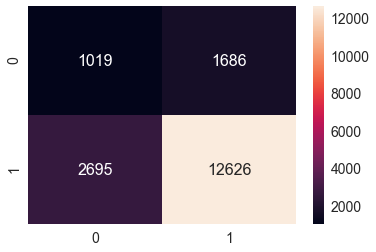

In [91]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Linear SVM on SET 3

In [67]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_essays.append(vector)
print("train  vector")
print(len(train_w2v_vectors_essays))
print(len(train_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_essays.append(vector)

print("Test vec")
print(len(test_w2v_vectors_essays))
print(len(test_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_essays.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_essays))
print(len(cv_w2v_vectors_essays[0]))
print('='*50)


100%|██████████████████████████████████| 24520/24520 [00:12<00:00, 1887.66it/s]

train  vector
24520
300



100%|██████████████████████████████████| 18026/18026 [00:10<00:00, 1766.08it/s]

Test vec
18026
300



100%|██████████████████████████████████| 12078/12078 [00:07<00:00, 1522.43it/s]

CV vec
12078
300


In [68]:
# Changing list to numpy arrays
train_w2v_vectors_essays = np.array(train_w2v_vectors_essays)
test_w2v_vectors_essays = np.array(test_w2v_vectors_essays)
cv_w2v_vectors_essays = np.array(cv_w2v_vectors_essays)


In [69]:
# average Word2Vec
# compute average word2vec for each title.
train_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_titles.append(vector)
print("train  vector")
print(len(train_w2v_vectors_titles))
print(len(train_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each title.
test_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_titles.append(vector)

print("Test vec")
print(len(test_w2v_vectors_titles))
print(len(test_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each title.
cv_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_titles.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_titles))
print(len(cv_w2v_vectors_titles[0]))
print('='*50)


100%|█████████████████████████████████| 24520/24520 [00:00<00:00, 29737.58it/s]

train  vector
24520
300



100%|█████████████████████████████████| 18026/18026 [00:00<00:00, 29338.92it/s]

Test vec
18026
300



100%|█████████████████████████████████| 12078/12078 [00:00<00:00, 30099.78it/s]

CV vec
12078
300


In [70]:
# Changing list to numpy arrays
train_w2v_vectors_titles = np.array(train_w2v_vectors_titles)
test_w2v_vectors_titles = np.array(test_w2v_vectors_titles)
cv_w2v_vectors_titles = np.array(cv_w2v_vectors_titles)

In [71]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((train_w2v_vectors_essays,train_w2v_vectors_titles,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((cv_w2v_vectors_essays,cv_w2v_vectors_titles,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((test_w2v_vectors_essays,test_w2v_vectors_titles,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 704) (24520,)
(12078, 704) (12078,)
(18026, 704) (18026,)


In [97]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

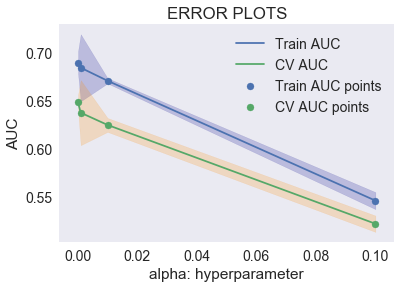

Wall time: 4.47 s


In [98]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier()
tuned_parameters = {'alpha': [10**-4,10**-3, 10**-2,10**-1]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

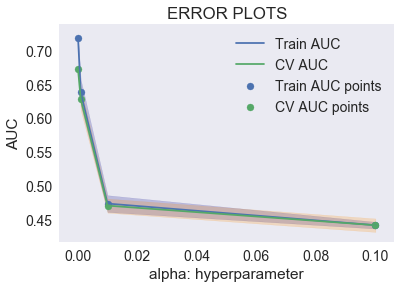

Wall time: 9.01 s


In [99]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier(penalty='l1')
tuned_parameters = {'alpha': [10**-4,10**-3, 10**-2,10**-1]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

L1 is more apt than l2 for this particular case

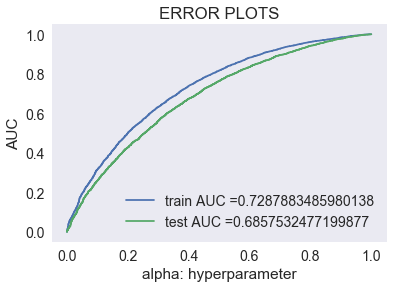

Wall time: 3.63 s


In [100]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

sgd=SGDClassifier(alpha=0.0001,penalty='l1')
#https://github.com/scikit-learn/scikit-learn/issues/7278
calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
calibrated_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(calibrated_clf, X_tr)    
y_test_pred = batch_predict(calibrated_clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [101]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [102]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.805
[[ 1840  1840]
 [ 3837 17003]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999658331084 for threshold 0.833
[[ 1573  1132]
 [ 4773 10548]]


the maximum value of tpr*(1-fpr) 0.2499999658331084 for threshold 0.833


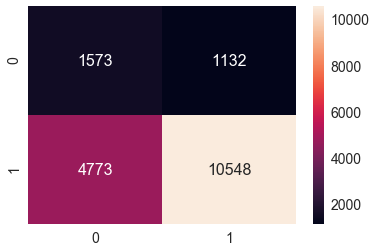

In [103]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Linear Regression on Set 4

In [104]:
# Please write all the code with proper documentation
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)
    
print("Train matrix:")
print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))
print('='*50)

cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)
    
print("CV matrix:")
print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))
print('='*50)

test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)
    
print("Test matrix:")
print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))
print('='*50)

100%|███████████████████████████████████| 24520/24520 [01:46<00:00, 229.58it/s]


Train matrix:
24520
300


100%|███████████████████████████████████| 12078/12078 [00:53<00:00, 224.79it/s]


CV matrix:
12078
300


100%|███████████████████████████████████| 18026/18026 [01:18<00:00, 228.69it/s]


Test matrix:
18026
300


In [105]:
# Changing list to numpy arrays
train_tfidf_w2v_essays = np.array(train_tfidf_w2v_essays)
test_tfidf_w2v_essays = np.array(test_tfidf_w2v_essays)
cv_tfidf_w2v_essays = np.array(cv_tfidf_w2v_essays)

In [106]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_titles'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)
    
print("Train matrix:")
print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))
print('='*50)

cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)
    
print("CV matrix:")
print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))
print('='*50)

test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)
    
print("Test matrix:")
print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))
print('='*50)

100%|█████████████████████████████████| 24520/24520 [00:01<00:00, 13795.82it/s]


Train matrix:
24520
300


100%|█████████████████████████████████| 12078/12078 [00:00<00:00, 15795.34it/s]


CV matrix:
12078
300


100%|█████████████████████████████████| 18026/18026 [00:01<00:00, 15669.02it/s]


Test matrix:
18026
300


In [107]:
# Changing list to numpy arrays
train_tfidf_w2v_titles = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_titles = np.array(test_tfidf_w2v_titles)
cv_tfidf_w2v_titles = np.array(cv_tfidf_w2v_titles)

In [108]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((train_tfidf_w2v_essays,train_tfidf_w2v_titles,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((cv_tfidf_w2v_essays,cv_tfidf_w2v_titles,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((test_tfidf_w2v_essays,test_tfidf_w2v_titles,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 704) (24520,)
(12078, 704) (12078,)
(18026, 704) (18026,)


In [109]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

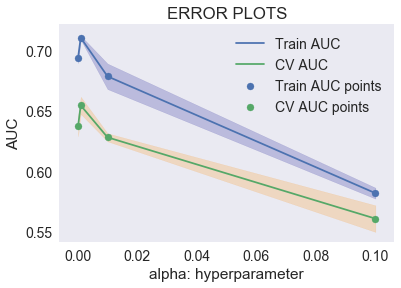

Wall time: 3.95 s


In [110]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier()
tuned_parameters = {'alpha': [10**-4,10**-3, 10**-2,10**-1]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

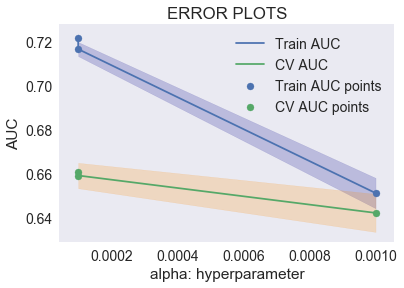

Wall time: 6.46 s


In [111]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier(penalty='l1')
tuned_parameters = {'alpha': [10**-4,10**-4,10**-3]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

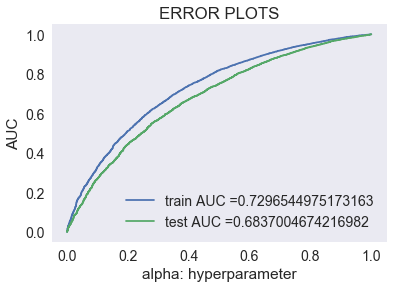

Wall time: 2.78 s


In [112]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

sgd=SGDClassifier(alpha=0.0001,penalty='l1')
#https://github.com/scikit-learn/scikit-learn/issues/7278
calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
calibrated_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(calibrated_clf, X_tr)    
y_test_pred = batch_predict(calibrated_clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [113]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.249999926157845 for threshold 0.813
[[ 1841  1839]
 [ 3811 17029]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999658331084 for threshold 0.834
[[ 1560  1145]
 [ 4783 10538]]


the maximum value of tpr*(1-fpr) 0.2499999658331084 for threshold 0.834


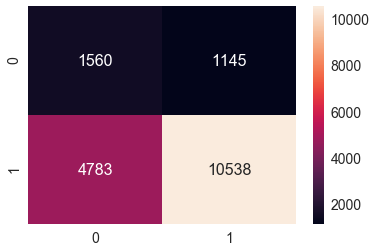

In [114]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [115]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

Computing TFIDF vectorizer on Essay data

In [165]:
#Vectorizing Essays
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tsvd_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tsvd_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tsvd_tfidf = vectorizer.transform(X_test['essay'].values)

print(X_train_essay_tsvd_tfidf.shape)
print(X_cv_essay_tsvd_tfidf.shape)
print(X_test_essay_tsvd_tfidf.shape)

(24520, 5000)
(12078, 5000)
(18026, 5000)


In [166]:
print(type(X_train_essay_tsvd_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [121]:
from sklearn.decomposition import TruncatedSVD
# PCA for dimensionality redcution (non-visualization)

trsvd = TruncatedSVD(n_components=4999)

X_trsvd=trsvd.fit(X_train_essay_tsvd_tfidf)
# print(type(tsvd))

In [128]:
# List of explained variances
from sklearn.decomposition import TruncatedSVD
tsvd_var_ratios = trsvd.explained_variance_ratio_

In [129]:
# Create a function
#https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components


In [132]:
# Run function
select_n_components(tsvd_var_ratios, 0.90)

2672

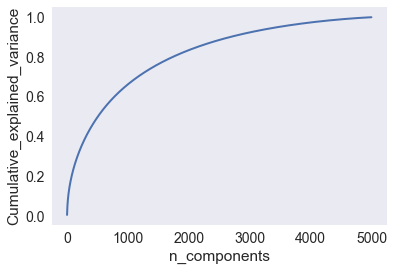

In [133]:
percentage_var_explained = trsvd.explained_variance_ / np.sum(trsvd.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


if we take around top 2500 features, we are able to preserve 90% of the variance.

In [167]:
# print(type(X_train_essay_tsvd_tfidf))
X_train_essay_tsvd_tfidf=X_train_essay_tsvd_tfidf[:,0:2500]
X_cv_essay_tsvd_tfidf=X_cv_essay_tsvd_tfidf[:,0:2500]
X_test_essay_tsvd_tfidf=X_test_essay_tsvd_tfidf[:,0:2500]
print(X_test_essay_tsvd_tfidf.shape)

(18026, 2500)


In [168]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tsvd_tfidf,X_train_words_essay_std,X_train_words_title_std,X_train_sentiment_neg_std,X_train_sentiment_neu_std,X_train_sentiment_pos_std,X_train_sentiment_compound_std,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_tsvd_tfidf,X_cv_words_essay_std,X_cv_words_title_std,X_cv_sentiment_neg_std,X_cv_sentiment_neu_std,X_cv_sentiment_pos_std,X_cv_sentiment_compound_std,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_tsvd_tfidf,X_test_words_essay_std,X_test_words_title_std,X_test_sentiment_neg_std,X_test_sentiment_neu_std,X_test_sentiment_pos_std,X_test_sentiment_compound_std,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 2610) (24520,)
(12078, 2610) (12078,)
(18026, 2610) (18026,)


<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [169]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

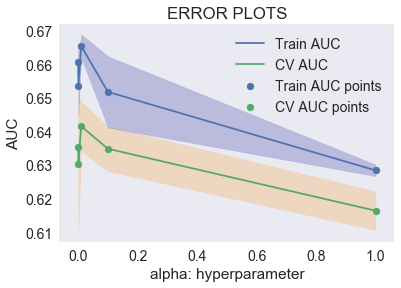

Wall time: 1.19 s


In [170]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier()
tuned_parameters = {'alpha': [10**-4,10**-3, 10**-2,10**-1,1]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

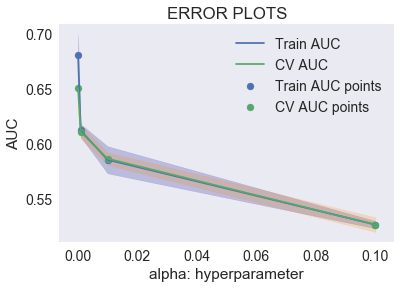

Wall time: 1.48 s


In [171]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


sgd=SGDClassifier(penalty='l1')
tuned_parameters = {'alpha': [10**-4,10**-3,10**-2,10**-1]}
clf = GridSearchCV(sgd, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(tuned_parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(tuned_parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
# print(clf.best_estimator_)

We will choose L1 regulizer

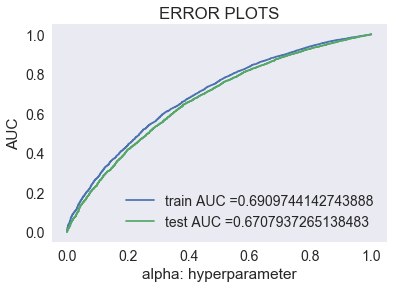

Wall time: 674 ms


In [175]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

sgd=SGDClassifier(alpha=0.0001,penalty='l1')
#https://github.com/scikit-learn/scikit-learn/issues/7278
calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
calibrated_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(calibrated_clf, X_tr)    
y_test_pred = batch_predict(calibrated_clf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1>3. Conclusion</h1>

In [179]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter","Regulizer", "AUC"]

x.add_row(["BOW", "BRUTE", 0.01,"L2", 0.83])
x.add_row(["TFIDF", "BRUTE", 0.001,"L2",0.84 ])
x.add_row(["W2V", "BRUTE", 0.0001,"L1", 0.72])
x.add_row(["TFIDFW2V", "BRUTE", 0.0001,"L1", 0.72])
x.add_row(["TruncatedSVD-Elbow method", "BRUTE", 0.0001,"L1", 0.69])


print(x)

+---------------------------+-------+-----------------+-----------+------+
|         Vectorizer        | Model | Hyper Parameter | Regulizer | AUC  |
+---------------------------+-------+-----------------+-----------+------+
|            BOW            | BRUTE |       0.01      |     L2    | 0.83 |
|           TFIDF           | BRUTE |      0.001      |     L2    | 0.84 |
|            W2V            | BRUTE |      0.0001     |     L1    | 0.72 |
|          TFIDFW2V         | BRUTE |      0.0001     |     L1    | 0.72 |
| TruncatedSVD-Elbow method | BRUTE |      0.0001     |     L1    | 0.69 |
+---------------------------+-------+-----------------+-----------+------+
